In [10]:
from keras.datasets import mnist
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

(x_train, y_train), (z_test, y_test) = mnist.load_data()

X = np.zeros((x_train.shape[0], 784))
for i in range(x_train.shape[0]):
    X[i] = x_train[i].flatten()
X = pd.DataFrame(X)
Y = pd.DataFrame(y_train)
X = X.sample(frac=0.1, random_state=10).reset_index(drop=True)
Y = Y.sample(frac=0.1, random_state=10).reset_index(drop=True)
#X = X.reset_index(drop=True)
#Y = Y.reset_index(drop=True)
V = pd.DataFrame(x_train[1])
x_train.shape

(60000, 28, 28)

In [ ]:
import time

time_start = time.time()
tsne = TSNE(n_components=2, perplexity=105, random_state=123)
tsne_results = tsne.fit_transform(df.values)
df['label'] = Y

print ('Время t-SNE: ', time.time()-time_start)

Время t-SNE:  96.44603681564331


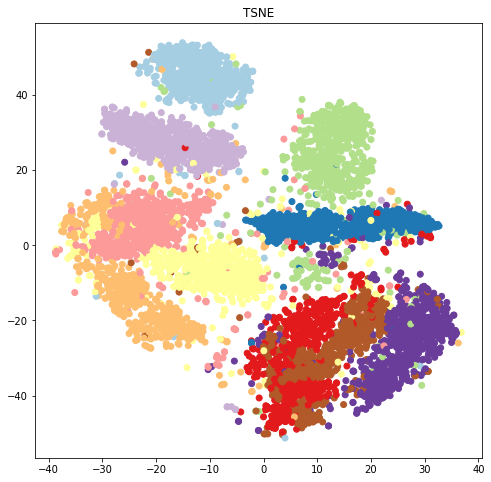

In [ ]:
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE')
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=df['label'], 
    cmap=plt.cm.get_cmap('Paired'))
plt.show()

In [ ]:
#!pip install umap-learn
import umap

In [ ]:
time_start = time.time()
fit = umap.UMAP(n_neighbors=55, min_dist=0.6, random_state=123)
u = fit.fit_transform(X)
print ('Время UMAP: ', (time.time()-time_start))

Время UMAP:  33.242910861968994


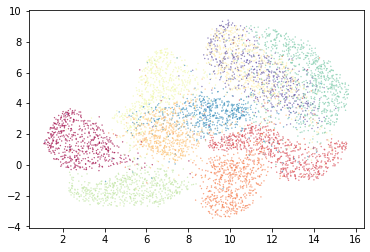

In [ ]:
plt.scatter(u[:,0], u[:,1], c=Y, cmap="Spectral", s=0.1)